# Purity and excitation probability comparison

We will use a square wavepacket and compare markovian and wavepacket evolution.

Note:

3dB of squeezing is $r \approx 0.31$


4.5dB of squeezing is $r \approx 0.51$



In [18]:
#plt.style.use('../../../../jupyter/research-notebooks/website.mplstyle')

In [4]:
np.log(2)

0.6931471805599453

In [5]:
from functools import partial
import pickle
import numpy as np
from scipy.integrate import quad

from tqdm import tqdm_notebook

import pysme.hierarchy as hier
import pysme.integrate as integ

import matplotlib.pyplot as plt
import matplotlib
# #from quantum_utilities.qubits import Id, sigm, sigz, zero

In [6]:
# Define Lowering operator and Sigma Z

Id = np.eye(2, dtype=complex)

zero = np.zeros((2,2), dtype=complex)

sigz = np.array([[1, 0], [0, -1]], dtype=complex)

sigx = np.array([[0, 1], [1, 0]], dtype=complex)

sigy = np.array([[0, -1j], [1j, 0]], dtype=complex)

sigm = np.array([[0, 0], [1, 0]], dtype=complex)

In [7]:
def rect(x, a, b):
    return np.where(x < a, 0, np.where(x < b, 1, 0))

def xi_rect(t, a, b):
    return rect(t, a, b)/np.sqrt(b - a)

def xi_gau(t, Omega, ta):
    return np.power(Omega**2/(2*np.pi), 1/4) * np.exp(-Omega**2*(t - ta)**2/4)

In [10]:

xi_len = 4

xis = xi_rect(times, 0, xi_len)

In [61]:
def cartesian_product(*args: np.ndarray) -> np.ndarray:
    """
    Produce the cartesian product of arbitrary length vectors.

    Parameters
    ----------
    np.ndarray args
        vector of points of interest in each dimension

    Returns
    -------
    np.ndarray
        the cartesian product of size [m x n] wherein:
            m = prod([len(a) for a in args])
            n = len(args)
    """
    for i, a in enumerate(args):
        assert a.ndim == 1, "arg {:d} is not rank 1".format(i)
    return np.concatenate([np.reshape(xi, [-1, 1]) for xi in np.meshgrid(*args)], axis=1)

AssertionError: arg 0 is not rank 1

/Users/jcombes/opt/anaconda3/envs/pysme/lib/python3.8/site-packages/numpy/ma/core.py:2794: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


TypeError: Length of x (90) must match number of columns in z (2)

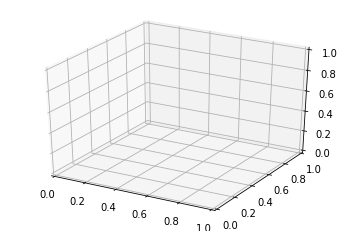

In [59]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xf, xf, cartesian_product(2.0/N * yf[0:N//2],2.0/N * yf[0:N//2]), 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [69]:
xf.reshape(len(xf),1)

array([[ 0.        ],
       [ 0.167603  ],
       [ 0.33520599],
       [ 0.50280899],
       [ 0.67041199],
       [ 0.83801498],
       [ 1.00561798],
       [ 1.17322097],
       [ 1.34082397],
       [ 1.50842697],
       [ 1.67602996],
       [ 1.84363296],
       [ 2.01123596],
       [ 2.17883895],
       [ 2.34644195],
       [ 2.51404494],
       [ 2.68164794],
       [ 2.84925094],
       [ 3.01685393],
       [ 3.18445693],
       [ 3.35205993],
       [ 3.51966292],
       [ 3.68726592],
       [ 3.85486891],
       [ 4.02247191],
       [ 4.19007491],
       [ 4.3576779 ],
       [ 4.5252809 ],
       [ 4.6928839 ],
       [ 4.86048689],
       [ 5.02808989],
       [ 5.19569288],
       [ 5.36329588],
       [ 5.53089888],
       [ 5.69850187],
       [ 5.86610487],
       [ 6.03370787],
       [ 6.20131086],
       [ 6.36891386],
       [ 6.53651685],
       [ 6.70411985],
       [ 6.87172285],
       [ 7.03932584],
       [ 7.20692884],
       [ 7.37453184],
       [ 7

/Users/jcombes/opt/anaconda3/envs/pysme/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


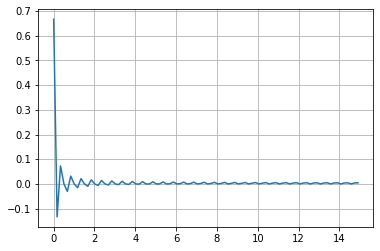

In [84]:
from scipy.fft import fft
# Number of sample points

# sample spacing

x = np.linspace(0, xi_len + 2, num=xi_len*30 + 60)
N = len(x)
T = x[2]-x[1]
y = xi_rect(x, 0, xi_len)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * yf[0:N//2])
#plt.plot(xf, (1/np.sqrt(2*np.pi))*np.sinc(4*np.pi*np.pi*xf/(2*xi_len)))
plt.grid()
plt.show()

# Match inital decay

In [45]:
# rs = np.arcsinh(np.sqrt(np.arange(5)))
# print('rs', rs)
# print('exp(rs)', np.exp(rs))
# print('sinh(rs)^2', np.sinh(rs)**2)


n_max = 22

Omega = 0 #1.21

# 3dB of squeezing  r \approx =0.31
3 / (20* np.log10(np.e))

# 4.5dB of squeezing r \approx 0.51
r = 4.5/ (20* np.log10(np.e))



r_val_wp = r 

print('r_val_wp', r_val_wp)
#r_val_bb = 0.2335848289126526

mu_val = 0

gam = 1

xi_len = 4

S = Id
L = np.sqrt(gam) * sigm
H = zero

rho0 = (Id + (sigx + sigy)/np.sqrt(2))/2 # np.array([[1, 0], [0, 0]], dtype=complex) # excited state

xi = xi_rect


times = np.linspace(0, xi_len + 2, num=xi_len*30 + 60)

r_val_wp 0.5180816459236602


In [46]:
## M and N params
M_wp = - np.exp(2j*mu_val)* np.sinh(r_val_wp) * np.cosh(r_val_wp)
N_wp = np.sinh(r_val_wp)**2

print('M = ', M_wp)
print('N = ', N_wp)

M =  (-0.6158923855077195-0j)
N =  0.2932990801245072


### Wavepacket

In [47]:
factory = hier.HierarchyIntegratorFactory(2, n_max)
           
integrators = factory.make_uncond_integrator(partial(xi, a=0, b=xi_len), S, L, H, r=r_val_wp, mu=mu_val)

In [48]:
solns = integrators.integrate(rho0, times)

In [49]:
def rho_from_ket(ket):
    return np.outer(ket, ket.conj())

def vac_rho(n):
    ket = np.zeros(n + 1, dtype=np.complex)
    ket[0] = 1
    return rho_from_ket(ket)

### Vacuum evolution

In [50]:
vac_integrator_object = integ.UncondLindbladIntegrator([L],H)
vac_soln = vac_integrator_object.integrate(rho0, times)

### Markovian Squeezed evolution

here we numerically optimize over the squeeze parameter to match the inital decay of the wavepacket solution

In [51]:
# Wavepacket shape
# TODO: make wavepacket return to vac soln after x>b: f1-> 1 & f2 -> 0
def f1(x, a, b, mu, r):
    return np.cosh(r)*np.where(x < a, 0, np.where(x < b, 1, 0))

def f2(x, a, b, mu, r):
    return np.exp(2j*mu)* np.sinh(r)*np.where(x < a, 0, np.where(x < b, 1, 0))


#fc = partial(f1, a=0, b=xi_len, mu=mu_val, r=r_val_bb)
#fs = partial(f2, a=0, b=xi_len, mu=mu_val, r=r_val_bb)

#L_list = [[(L, fc), (np.conj(np.transpose(L)), fs)]]
#H_list = [H]

#broadband_integrator_object = integ.UncondTimeDepLindInt(L_list, H_list)
#markov_soln = broadband_integrator_object.integrate(rho0, times)

find squeezing amount to match the decay curve over the first 1 unit of time of the wavepacket

In [52]:
stz = 0.0
stp = 1.01
print('the index of t='+str(stz)+' is ', np.argmin((times-stz)**2))
print('the index of t='+str(stp)+' is ', np.argmin((times-stp)**2))

startz = np.argmin((times-stz)**2)
endz = np.argmin((times-stp)**2)
tp = times[startz:endz]
x_wp = solns.get_expectations(sigx, vac_rho(n_max))
y_wp = solns.get_expectations(sigy, vac_rho(n_max))
z_wp = solns.get_expectations(sigz, vac_rho(n_max))
xwp = x_wp[startz:endz]
ywp = y_wp[startz:endz]
zwp = z_wp[startz:endz]


def func(r_val_bb, *params):
    times, L, H, xi_len, mu_val, rho0 , xwp, ywp, zwp, startz, endz = params
    fc = partial(f1, a=0, b=xi_len, mu=mu_val, r=r_val_bb)
    fs = partial(f2, a=0, b=xi_len, mu=mu_val, r=r_val_bb)
    L_list = [[(L, fc), (np.conj(np.transpose(L)), fs)]]
    H_list = [H]
    broadband_integrator_object = integ.UncondTimeDepLindInt(L_list, H_list)
    markov_soln = broadband_integrator_object.integrate(rho0, times)
    x_m = markov_soln.get_expectations(sigx)
    y_m = markov_soln.get_expectations(sigy)
    z_m = (markov_soln.get_expectations(sigz) + 1)/2
    xm = x_m[startz:endz]
    ym = y_m[startz:endz]
    zm = z_m[startz:endz]
    return np.sum( (ywp - ym)**2) + np.sum( (xwp - xm)**2)

the index of t=0.0 is  0
the index of t=1.01 is  30


In [20]:
from scipy import optimize
paramz = (times, L, H, xi_len, mu_val, rho0, xwp, ywp, zwp, startz, endz)
rangez = (0.0001,0.53)

soln = optimize.minimize_scalar(func, bracket=None, bounds=rangez, args=paramz)

print(soln)

r_val_bb = soln.x

     fun: 0.009175521394508614
    nfev: 19
     nit: 15
 success: True
       x: 0.09570808577932297


simulate markovian squeezed evolution with  numercially found optimal amount of squeezing

In [21]:
fc = partial(f1, a=0, b=xi_len, mu=mu_val, r=r_val_bb)
fs = partial(f2, a=0, b=xi_len, mu=mu_val, r=r_val_bb)
L_list = [[(L, fc), (np.conj(np.transpose(L)), fs)]]
H_list = [H]
broadband_integrator_object = integ.UncondTimeDepLindInt(L_list, H_list)
markov_soln = broadband_integrator_object.integrate(rho0, times)
x_m = markov_soln.get_expectations(sigx)
y_m = markov_soln.get_expectations(sigy)
z_m = markov_soln.get_expectations(sigz)
xm = x_m[startz:endz]
ym = y_m[startz:endz]
zm = z_m[startz:endz]

In [53]:
ones = 0.7071067811865475*np.ones_like(xm)
zeros = np.zeros_like(xm)

### Yeoman Barnett Quasi Markovain

In [2]:
def lam_mu(gamma_c, eps):
    lam = gamma_c + eps
    mu = gamma_c - eps
    return lam, mu

def N_degen_PA(omega, omega_A, lam, mu):
    return (lam**2 - mu**2)/4*(1/((omega - omega_A)**2 + mu**2)
                               - 1/((omega - omega_A)**2 + lam**2))
    
def mod_M_degen_PA(omega, omega_A, lam, mu):
    return (lam**2 - mu**2)/4*(1/((omega - omega_A)**2 + mu**2)
                               + 1/((omega - omega_A)**2 + lam**2))

def deltas_degen_PA(gamma_c, Omega, lam, mu):
    delta_mu = gamma_c*Omega*(lam**2 - mu**2)/(4*mu*(Omega**2 + mu**2))
    delta_lam = gamma_c*Omega*(lam**2 - mu**2)/(4*lam*(Omega**2 + mu**2))
    return delta_mu, delta_lam

def F_G(delta_mu, delta_lam, Phi):
    F_A = -(1j/4)*(delta_mu*(1 + np.cos(Phi))
                   - delta_lam*(1 - np.cos(Phi)))
    G_A = -(1/4)*(delta_mu + delta_lam)*np.sin(Phi)
    return F_A, G_A

def get_degen_PA_params(Omega, omega_A, omega_L, gamma_c, eps, phi_L, phi_s):
    lam, mu = lam_mu(gamma_c, eps)
    N_A = N_degen_PA(omega_A, omega_A, lam, mu)
    N_Om = N_degen_PA(omega_A + Omega, omega_A, lam, mu)
    mod_M_A = mod_M_degen_PA(omega_A, omega_A, lam, mu)
    mod_M_Om = mod_M_degen_PA(omega_A + Omega, omega_A, lam, mu)
    M_A = np.exp(2j*phi_s)*mod_M_A
    M_Om = np.exp(2j*phi_s)*mod_M_Om
    Delta_AL = omega_A - omega_L
    Phi = 2*phi_L - phi_s
    delta_mu, delta_lam = deltas_degen_PA(gamma_c, Omega, lam, mu)
    F_A, G_A = F_G(delta_mu, delta_lam, Phi)
    return N_A, N_Om, M_A, M_Om, Delta_AL, F_A, G_A

In [ ]:
Omega = 2*np.abs(beta) # rabi freq
phi_L = np.angle(beta) # laser phase
omega_A = 0 # atomic transition freq
omega_L = 0 # laser freq
gamma_c = 1 # Atomic linewidth
eps = 0.5
phi_s = 0 # squeezing phase
omega_A, omega_L, gamma_c, eps, phi_L, phi_s

In [ ]:
N_A, N_Om, M_A, M_Om, Delta_AL, F_A, G_A = get_degen_PA_params(Omega, omega_A, omega_L, gamma_c, eps, phi_L, phi_s)

quasi_integrator = integ.QuasiMarkoff2LvlIntegrator(gamma, N_A, N_Om, M_A, M_Om, Delta_AL, Omega, phi_L, F_A, G_A)

soln_ss = integrator.integrate(Id/2, times_ss)

    rho_ss = soln_ss.get_density_matrices(np.s_[-1])


In [ ]:
def xi_rect(t, a, b):
    return rect(t, a, b)/np.sqrt(b - a)

In [102]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

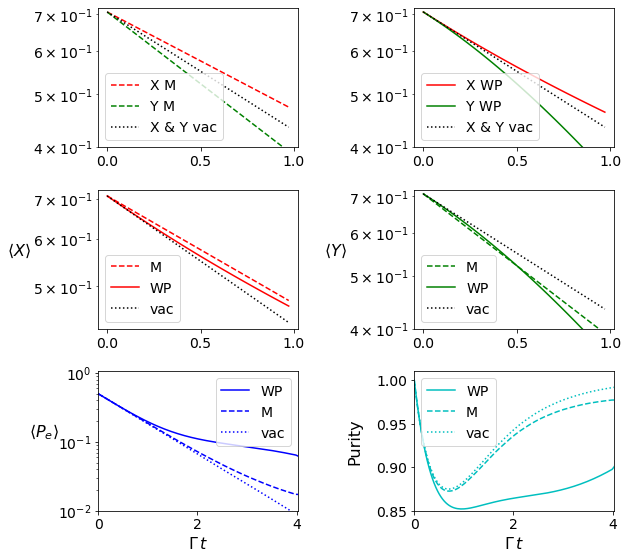

In [110]:

fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(9, 8), sharey=False)

axs[0,0].semilogy(times[startz:endz], xm, label='X M',linestyle='--',color='r')
axs[0,0].semilogy(times[startz:endz], ym, label='Y M',linestyle='--',color='g')
axs[0,0].semilogy(times[startz:endz], vac_soln.get_expectations(sigy)[startz:endz], label='X & Y vac',linestyle=':',color='k')
#axs[1].set_ylabel(r'$\langle Y \rangle$',rotation=0,labelpad=14)
#axs[0,0].set_title('Markovian')
axs[0,0].set_ylim([4e-1,7.2e-1])
axs[0,0].legend()
axs[0,1].semilogy(times[startz:endz], xwp, label='X WP',linestyle='-',color='r')
axs[0,1].semilogy(times[startz:endz], ywp, label='Y WP',linestyle='-',color='g')
axs[0,1].semilogy(times[startz:endz], vac_soln.get_expectations(sigx)[startz:endz], label='X & Y vac',linestyle=':',color='k')
#axs[0].set_ylabel(r'',rotation=0,labelpad=14)
axs[0,1].set_ylim([4e-1,7.2e-1])
#axs[0,1].set_title('Wave packet')
axs[0,1].legend()



axs[1,1].semilogy(times[startz:endz], ym, label='M',linestyle='--',color='g')
axs[1,1].semilogy(times[startz:endz], ywp, label='WP',linestyle='-',color='g')
axs[1,1].semilogy(times[startz:endz], vac_soln.get_expectations(sigy)[startz:endz], label='vac',linestyle=':',color='k')
axs[1,1].set_ylabel(r'$\langle Y \rangle$',rotation=0,labelpad=14)
axs[1,1].set_ylim([4e-1,7.2e-1])
axs[1,1].legend()
axs[1,0].semilogy(times[startz:endz], xm, label='M',linestyle='--',color='r')
axs[1,0].semilogy(times[startz:endz], xwp, label='WP',linestyle='-',color='r')
axs[1,0].semilogy(times[startz:endz], vac_soln.get_expectations(sigx)[startz:endz], label='vac',linestyle=':',color='k')
axs[1,0].set_ylabel(r'$\langle X \rangle$',rotation=0,labelpad=14)
#axs[0,1].set_ylim([4e-1,7.2e-1])
#axs[0].set_yticks(minor=True)
axs[1,0].legend()



# asdf




rwp_plot = np.round(r_val_wp,3)
rbb_plot = np.round(r_val_bb,3)

#axs[2,0].plot(times, xi_rect(times,a=0, b=xi_len),label=r'$\xi(t)$',linestyle='--',color='k')
axs[2,0].semilogy(times, (solns.get_expectations(sigz, vac_rho(n_max)) + 1)/2,label='WP',linestyle='-',color='b')
axs[2,0].semilogy(times, (markov_soln.get_expectations(sigz) + 1)/2, label='M',linestyle='--',color='b')
axs[2,0].semilogy(times, (vac_soln.get_expectations(sigz) + 1)/2, label='vac',linestyle=':',color='b')
#axs[0].set_yscale('log')
axs[2,0].set_xlim(0.0, 4.025)
axs[2,0].set_ylim(1e-2, 1.05) 
axs[2,0].set_ylabel(r'$\langle P_e \rangle $',rotation=0,labelpad=14) 
axs[2,0].set_xlabel(r'$\Gamma\, t $')
axs[2,0].legend()

#axs[2,1].plot(times, solns.get_purities(vac_rho(n_max)),label='WP r =' + str(rwp_plot),linestyle='-',color='c')
#axs[2,1].plot(times, markov_soln.get_purities(),label='Markov r = ' + str(rbb_plot), linestyle='--',color='c')
axs[2,1].plot(times, solns.get_purities(vac_rho(n_max)),label='WP',linestyle='-',color='c')
axs[2,1].plot(times, markov_soln.get_purities(),label='M', linestyle='--',color='c')
axs[2,1].plot(times, vac_soln.get_purities(),label='vac',linestyle=':',color='c')
#f3_ax2.set_yscale('log')
axs[2,1].set_xlim(0.0, 4.025)
axs[2,1].set_ylim(0.85, 1.01) 
axs[2,1].set_xlabel(r'$\Gamma\, t $')
axs[2,1].set_ylabel(r'Purity',labelpad=14)
axs[2,1].legend()#loc='upper left')


plt.tight_layout()

name='wp_v_markov_cmp'
plt.savefig(name+'.pdf',bbox_inches = 'tight', pad_inches = 0.02)

In [111]:
r_val_bb


0.09570808577932297

In [56]:
# fc = partial(f1, a=0, b=xi_len, mu=mu_val, r=r_val_bb)
# fs = partial(f2, a=0, b=xi_len, mu=mu_val, r=r_val_bb)

# L_list = [[(L, fc), (np.conj(np.transpose(L)), fs)]]

# H_list = [H]

# broadband_integrator_object = integ.UncondTimeDepLindInt(L_list, H_list)
# markov_soln = broadband_integrator_object.integrate(rho0, times)

In [57]:
#M and N params
M = - np.exp(2j*mu_val)* np.sinh(r_val_bb) * np.cosh(r_val_bb)
N = np.sinh(r_val_bb)**2

print(N,M)
print(N+M+1/2)
print(N-M+1/2)

0.009188040628679658 (-0.09629361723018783-0j)
(0.4128944233984918+0j)
(0.6054816578588675+0j)


In [58]:
# expected modification of decay rate relative to vac
2*N+1


1.0183760812573592

In [114]:
np.exp(r_val_bb)
np.exp(-r_val_bb)


0.9087292483446231

# Match steady state exitation probablity

In [115]:
# rs = np.arcsinh(np.sqrt(np.arange(5)))
# print('rs', rs)
# print('exp(rs)', np.exp(rs))
# print('sinh(rs)^2', np.sinh(rs)**2)


n_max = 22

Omega = 0 #1.21

# 3dB of squeezing  r \approx =0.31
3 / (20* np.log10(np.e))

# 4.5dB of squeezing r \approx 0.51
r = 4.5/ (20* np.log10(np.e))



r_val_wp = r 

#r_val_bb = 0.2335848289126526

mu_val = 0

gam = 1

xi_len = 9


S = Id
L = np.sqrt(gam) * sigm
H = zero


rho0 = (Id + (sigx + sigy)/np.sqrt(2))/2
#np.array([[1, 0], [0, 0]], dtype=complex) # excited state
#

xi = xi_rect



times = np.linspace(0, xi_len + 2, num=xi_len*30 + 60)



In [116]:
print(np.trace(rho0@sigx))
print(np.trace(rho0@sigy))
print(np.trace(rho0@sigz))

(0.7071067811865475+0j)
(0.7071067811865475+0j)
0j


In [117]:
# wavepacket 

factory = hier.HierarchyIntegratorFactory(2, n_max)
           
integrators = factory.make_uncond_integrator(partial(xi, a=0, b=xi_len), S, L, H, r=r_val_wp, mu=mu_val)

solns = integrators.integrate(rho0, times)

In [118]:
# vaccum
vac_integrator_object = integ.UncondLindbladIntegrator([L],H)
vac_soln = vac_integrator_object.integrate(rho0, times)

In [119]:
stz = 5.0
stp = 9.0
print('the index of t='+str(stz)+' is ', np.argmin((times-stz)**2))
print('the index of t='+str(stp)+' is ', np.argmin((times-stp)**2))

startz = np.argmin((times-stz)**2)
endz = np.argmin((times-stp)**2)
tp = times[startz:endz]
x_wp = solns.get_expectations(sigx, vac_rho(n_max))
y_wp = solns.get_expectations(sigy, vac_rho(n_max))
z_wp = solns.get_expectations(sigz, vac_rho(n_max))
xwp = x_wp[startz:endz]
ywp = y_wp[startz:endz]
zwp = (z_wp[startz:endz]+1)/2


def func(r_val_bb, *params):
    times, L, H, xi_len, mu_val, rho0 , xwp, ywp, zwp, startz, endz = params
    fc = partial(f1, a=0, b=xi_len, mu=mu_val, r=r_val_bb)
    fs = partial(f2, a=0, b=xi_len, mu=mu_val, r=r_val_bb)
    L_list = [[(L, fc), (np.conj(np.transpose(L)), fs)]]
    H_list = [H]
    broadband_integrator_object = integ.UncondTimeDepLindInt(L_list, H_list)
    markov_soln = broadband_integrator_object.integrate(rho0, times)
    x_m = markov_soln.get_expectations(sigx)
    y_m = markov_soln.get_expectations(sigy)
    z_m = (markov_soln.get_expectations(sigz) + 1)/2
    xm = x_m[startz:endz]
    ym = y_m[startz:endz]
    zm = z_m[startz:endz]
    return np.sum( (zwp - zm)**2)

the index of t=5.0 is  150
the index of t=9.0 is  269


In [120]:
from scipy import optimize
paramz = (times, L, H, xi_len, mu_val, rho0, xwp, ywp, zwp, startz, endz)
rangez = (0.0001,0.53)

soln = optimize.minimize_scalar(func, bracket=None, bounds=rangez, args=paramz)

print(soln)

r_val_bb = soln.x

     fun: 0.0027187948894989307
    nfev: 18
     nit: 14
 success: True
       x: 0.21411470432227903


In [121]:
fc = partial(f1, a=0, b=xi_len, mu=mu_val, r=r_val_bb)
fs = partial(f2, a=0, b=xi_len, mu=mu_val, r=r_val_bb)

L_list = [[(L, fc), (np.conj(np.transpose(L)), fs)]]

H_list = [H]

broadband_integrator_object = integ.UncondTimeDepLindInt(L_list, H_list)
markov_soln = broadband_integrator_object.integrate(rho0, times)

In [122]:
x_m = markov_soln.get_expectations(sigx)
y_m = markov_soln.get_expectations(sigy)
z_m = (markov_soln.get_expectations(sigz) + 1)/2

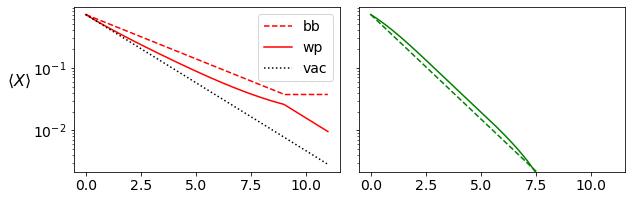

In [123]:

fig, axs = plt.subplots(ncols=2, figsize=(9, 3), sharey=True)
axs[0].semilogy(times, x_m, label='bb',linestyle='--',color='r')
axs[0].semilogy(times, x_wp, label='wp',linestyle='-',color='r')
axs[0].semilogy(times, vac_soln.get_expectations(sigx), label='vac',linestyle=':',color='k')
axs[0].set_ylabel(r'$\langle X \rangle$',rotation=0,labelpad=14)
#axs[0].set_ylim([4e-1,7.2e-1])
#axs[0].set_yticks(minor=True)
axs[0].legend()
axs[1].semilogy(times, y_m, label='bb',linestyle='--',color='g')
axs[1].semilogy(times, y_wp, label='wp',linestyle='-',color='g')
# axs[1].semilogy(times[startz:endz], vac_soln.get_expectations(sigy)[startz:endz], label='vac',linestyle=':',color='k')
# axs[1].set_ylabel(r'$\langle Y \rangle$',rotation=0,labelpad=14)
# axs[1].set_ylim([4e-1,7.2e-1])
# axs[1].legend()


plt.tight_layout()
name='bloch_cmp'
plt.savefig(name+'.pdf',bbox_inches = 'tight', pad_inches = 0.02)

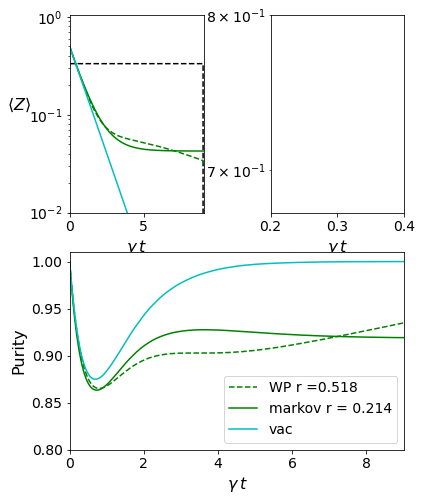

In [124]:
gs = matplotlib.gridspec.GridSpec(2, 1)
fig = plt.figure(figsize=[6, 8])

gs = fig.add_gridspec(ncols=2, nrows=2,wspace=0.5)


f3_ax0 = fig.add_subplot(gs[0, :-1])
f3_ax1 = fig.add_subplot(gs[0, 1])
f3_ax2 = fig.add_subplot(gs[1, :])


rwp_plot = np.round(r_val_wp,3)
rbb_plot = np.round(r_val_bb,3)

f3_ax0.plot(times, xi_rect(times,a=0, b=xi_len),label='WP',linestyle='--',color='k')
f3_ax0.plot(times, (solns.get_expectations(sigz, vac_rho(n_max)) + 1)/2,label='Z wp',linestyle='--',color='g')
f3_ax0.plot(times, (markov_soln.get_expectations(sigz) + 1)/2, label='Z markov',linestyle='-',color='g')
f3_ax0.plot(times, (vac_soln.get_expectations(sigz) + 1)/2, label='Z vac',linestyle='-',color='c')
f3_ax0.set_yscale('log')
f3_ax0.set_xlim(0.0, 9.025)
f3_ax0.set_ylim(1e-2, 1.05) 
f3_ax0.set_ylabel(r'$\langle Z \rangle $',rotation=0,labelpad=10) 
f3_ax0.set_xlabel(r'$\gamma\, t $')



f3_ax1.plot(times, xi_rect(times,a=0, b=xi_len),label='WP',linestyle='--',color='k')
f3_ax1.plot(times, (solns.get_expectations(sigz, vac_rho(n_max)) + 1)/2,label='Z wp',linestyle='--',color='g')
f3_ax1.plot(times, (markov_soln.get_expectations(sigz) + 1)/2, label='Z markov',linestyle='-',color='g')
f3_ax1.plot(times, (vac_soln.get_expectations(sigz) + 1)/2, label='Z vac',linestyle='-',color='c')
f3_ax1.set_yscale('log')
f3_ax1.set_xlim(0.2, 0.4)
f3_ax1.set_ylim(6.75e-1, 8e-1) 
f3_ax1.set_xlabel(r'$\gamma\, t $')



f3_ax2.plot(times, solns.get_purities(vac_rho(n_max)),label='WP r =' + str(rwp_plot),linestyle='--',color='g')
f3_ax2.plot(times, markov_soln.get_purities(),label='markov r = ' + str(rbb_plot), linestyle='-',color='g')
f3_ax2.plot(times, vac_soln.get_purities(),label='vac',linestyle='-',color='c')
#f3_ax2.set_yscale('log')
f3_ax2.set_xlim(0.0, 9.025)
f3_ax2.set_ylim(0.8, 1.01) 
f3_ax2.set_xlabel(r'$\gamma\, t $')
f3_ax2.set_ylabel(r'Purity',labelpad=5)
f3_ax2.legend()


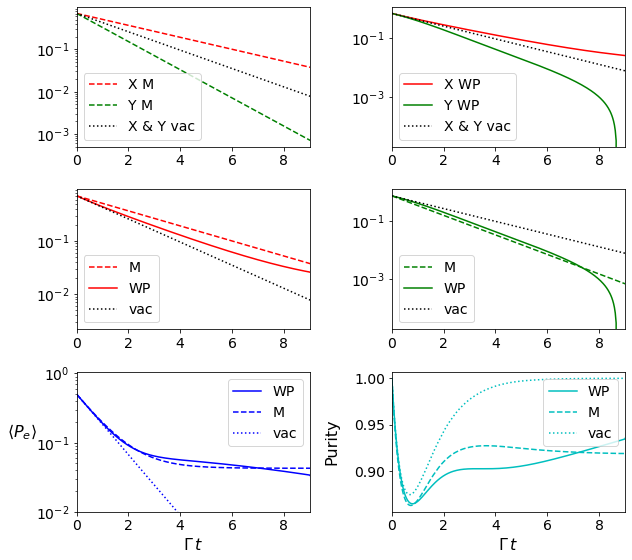

In [159]:

fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(9, 8), sharey=False)

axs[0,0].semilogy(times, markov_soln.get_expectations(sigx), label='X M',linestyle='--',color='r')
axs[0,0].semilogy(times, markov_soln.get_expectations(sigy), label='Y M',linestyle='--',color='g')
axs[0,0].semilogy(times, vac_soln.get_expectations(sigy), label='X & Y vac',linestyle=':',color='k')
#axs[1].set_ylabel(r'$\langle Y \rangle$',rotation=0,labelpad=14)
#axs[0,0].set_title('Markovian')
axs[0,0].set_xlim([0,9])
axs[0,0].legend()
axs[0,1].semilogy(times, solns.get_expectations(sigx, vac_rho(n_max)), label='X WP',linestyle='-',color='r')
axs[0,1].semilogy(times, solns.get_expectations(sigy, vac_rho(n_max)), label='Y WP',linestyle='-',color='g')
axs[0,1].semilogy(times, vac_soln.get_expectations(sigx), label='X & Y vac',linestyle=':',color='k')
axs[0,1].set_xlim([0,9])
#axs[0].set_ylabel(r'',rotation=0,labelpad=14)
#axs[0,1].set_ylim([4e-1,7.2e-1])
#axs[0,1].set_title('Wave packet')
axs[0,1].legend()



axs[1,1].semilogy(times, markov_soln.get_expectations(sigy), label='M',linestyle='--',color='g')
axs[1,1].semilogy(times, solns.get_expectations(sigy, vac_rho(n_max)), label='WP',linestyle='-',color='g')
axs[1,1].semilogy(times, vac_soln.get_expectations(sigy), label='vac',linestyle=':',color='k')
# axs[1,1].set_ylabel(r'$\langle Y \rangle$',rotation=0,labelpad=14)
# axs[1,1].set_ylim([4e-1,7.2e-1])
axs[1,1].set_xlim([0,9])
axs[1,1].legend()
axs[1,0].semilogy(times, markov_soln.get_expectations(sigx), label='M',linestyle='--',color='r')
axs[1,0].semilogy(times, solns.get_expectations(sigx, vac_rho(n_max)), label='WP',linestyle='-',color='r')
axs[1,0].semilogy(times, vac_soln.get_expectations(sigx), label='vac',linestyle=':',color='k')
axs[1,0].set_xlim([0,9])
# axs[1,0].set_ylabel(r'$\langle X \rangle$',rotation=0,labelpad=14)
# #axs[0,1].set_ylim([4e-1,7.2e-1])
# #axs[0].set_yticks(minor=True)
axs[1,0].legend()



# # asdf




# rwp_plot = np.round(r_val_wp,3)
# rbb_plot = np.round(r_val_bb,3)

# #axs[2,0].plot(times, xi_rect(times,a=0, b=xi_len),label=r'$\xi(t)$',linestyle='--',color='k')
axs[2,0].semilogy(times, (solns.get_expectations(sigz, vac_rho(n_max)) + 1)/2,label='WP',linestyle='-',color='b')
axs[2,0].semilogy(times, (markov_soln.get_expectations(sigz) + 1)/2, label='M',linestyle='--',color='b')
axs[2,0].semilogy(times, (vac_soln.get_expectations(sigz) + 1)/2, label='vac',linestyle=':',color='b')
axs[2,0].set_xlim([0,9])
# #axs[0].set_yscale('log')
axs[2,0].set_ylim(1e-2, 1.05) 
axs[2,0].set_ylabel(r'$\langle P_e \rangle $',rotation=0,labelpad=14) 
axs[2,0].set_xlabel(r'$\Gamma\, t $')
axs[2,0].legend()

# #axs[2,1].plot(times, solns.get_purities(vac_rho(n_max)),label='WP r =' + str(rwp_plot),linestyle='-',color='c')
axs[2,1].plot(times, solns.get_purities(vac_rho(n_max)),label='WP',linestyle='-',color='c')
axs[2,1].plot(times, markov_soln.get_purities(),label='M', linestyle='--',color='c')
axs[2,1].plot(times, vac_soln.get_purities(),label='vac',linestyle=':',color='c')
axs[2,1].set_xlim([0,9])
# #f3_ax2.set_yscale('log')
# axs[2,1].set_xlim(0.0, 4.025)
# axs[2,1].set_ylim(0.85, 1.01) 
axs[2,1].set_xlabel(r'$\Gamma\, t $')
axs[2,1].set_ylabel(r'Purity',labelpad=14)
axs[2,1].legend()#loc='upper left')


plt.tight_layout()

name='wp_v_markov_cmp_exitation'
plt.savefig(name+'.pdf',bbox_inches = 'tight', pad_inches = 0.02)

In [160]:
r_val_bb

0.21411470432227903